In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
data = pd.read_csv('housing.csv')

In [19]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [20]:
# Looking to see the amount of null values in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [21]:
# Removing all the Null values since they are not many
data.dropna(inplace=True)

In [23]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
train_data = X_train.join(y_train)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

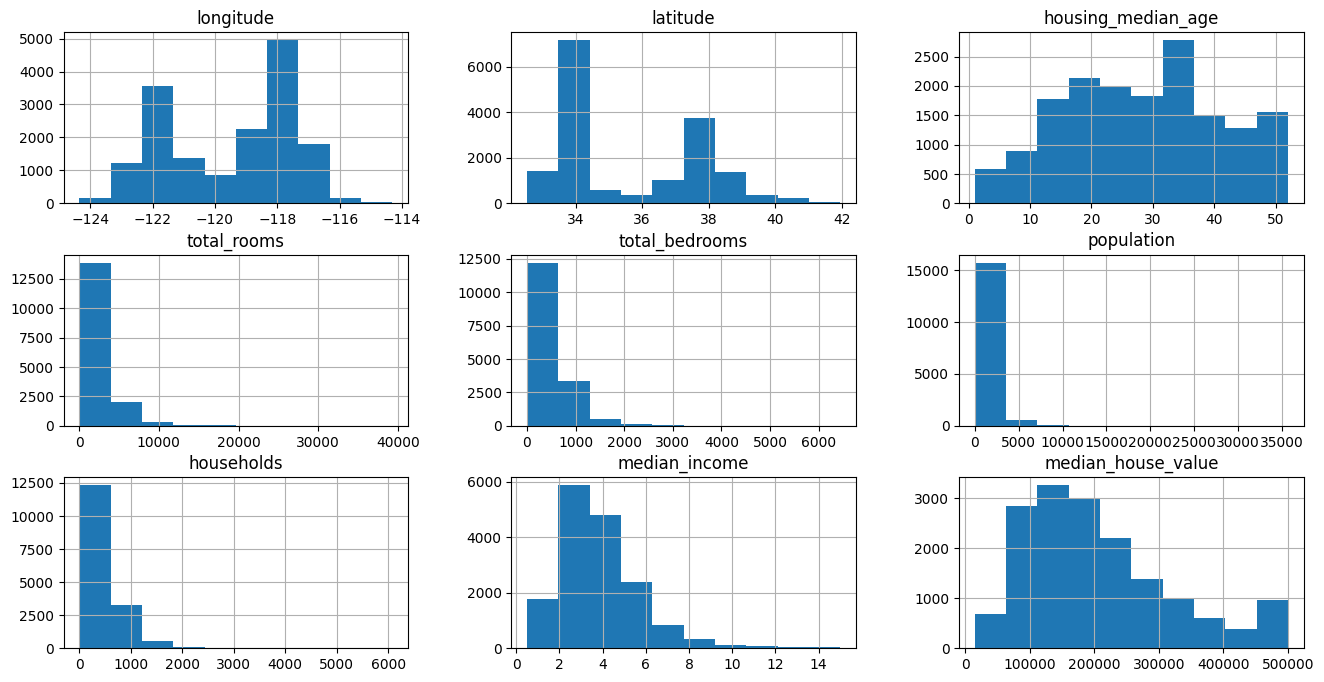

In [37]:
train_data.hist(figsize=(16,8))

C:\Users\billy\AppData\Local\Temp\ipykernel_15372\3901481315.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')


<AxesSubplot: >

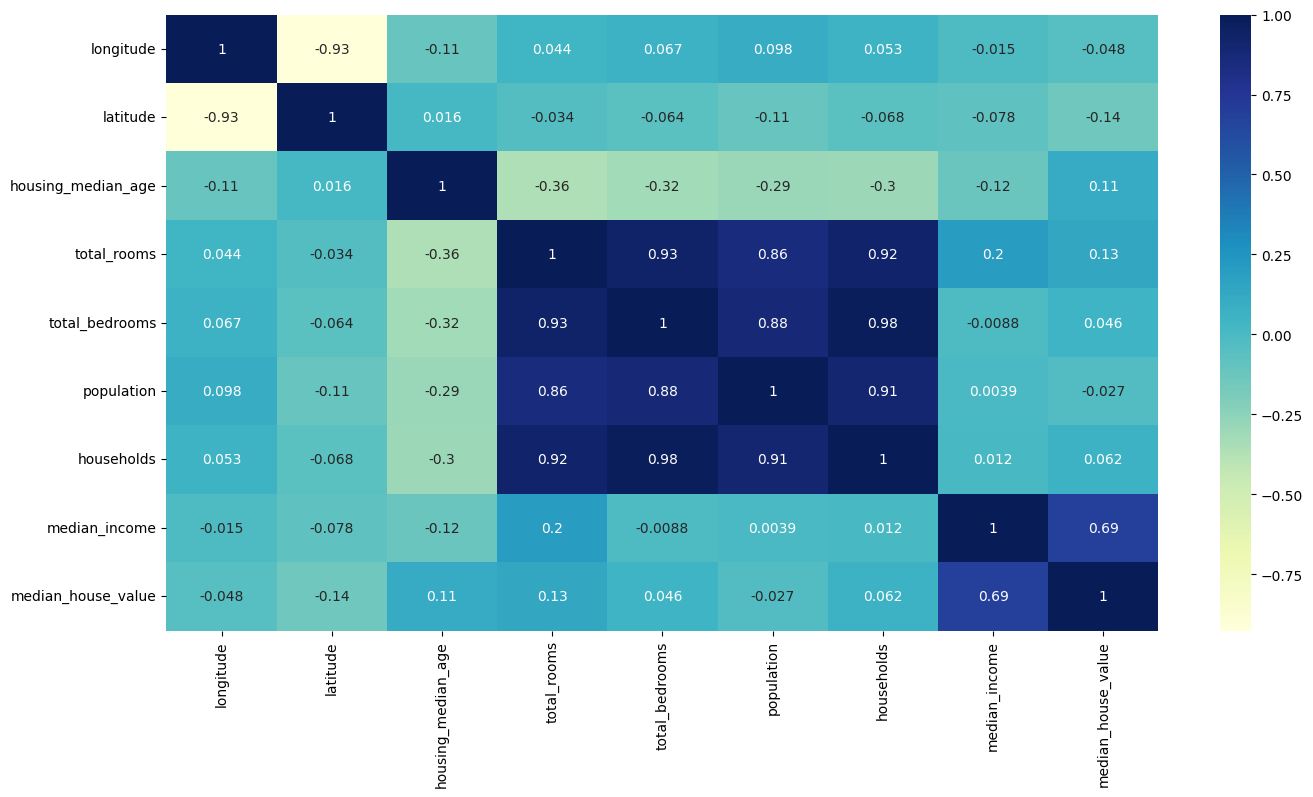

In [44]:
plt.figure(figsize=(16,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [45]:
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

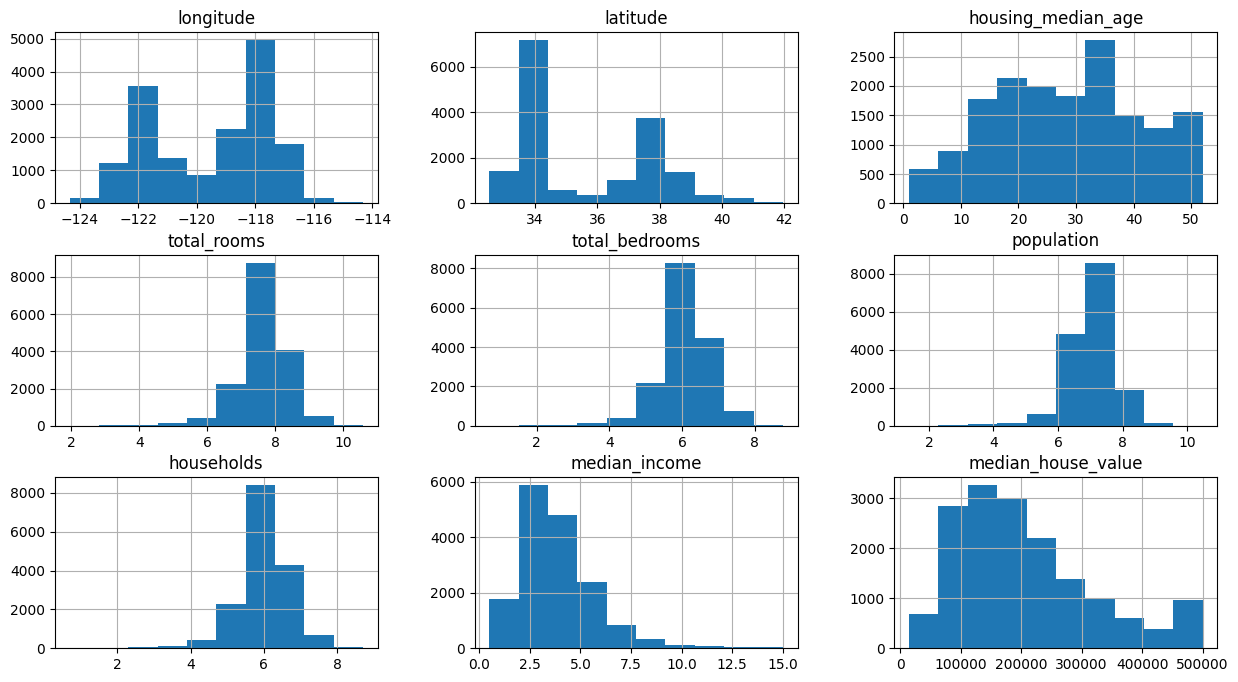

In [46]:
train_data.hist(figsize=(15,8))

In [51]:
# One Hot Encoding using panadas on the ocean proximity column and joining it to the training data
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

<AxesSubplot: >

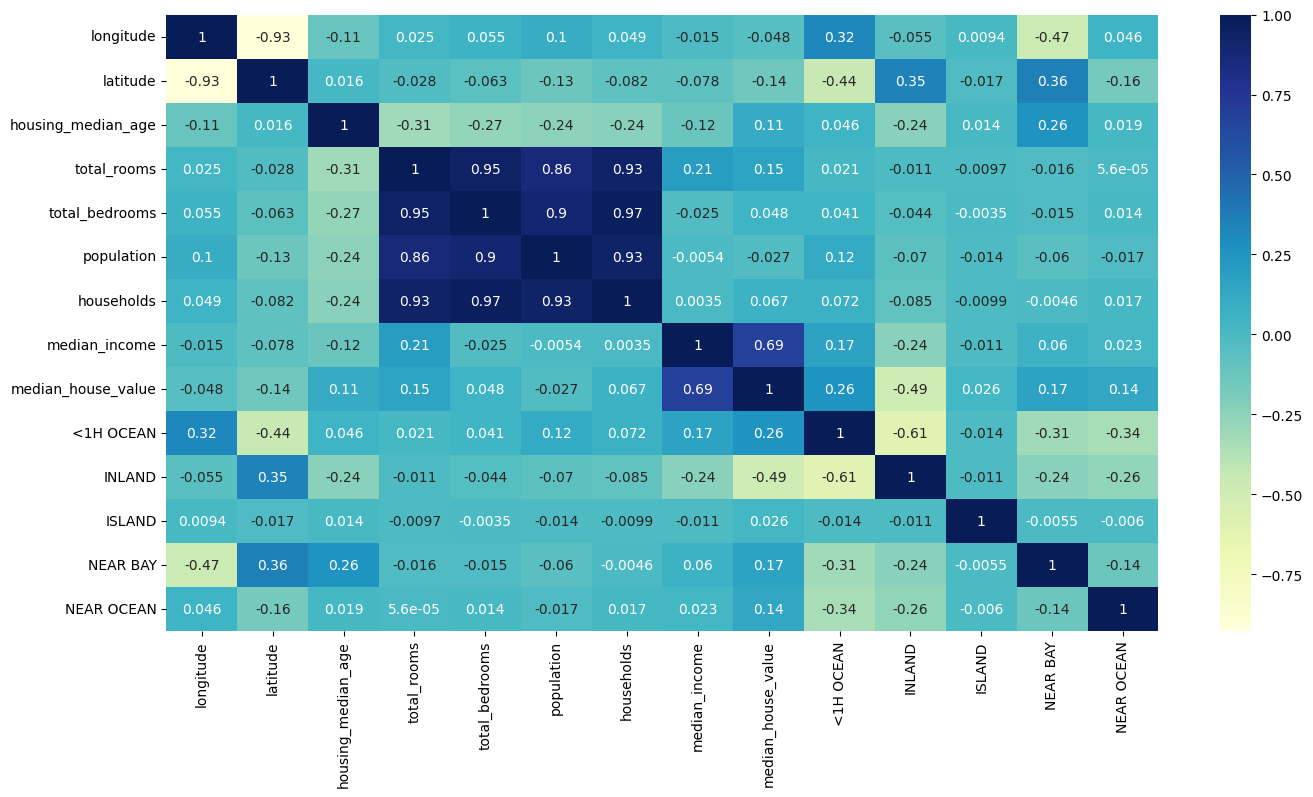

In [53]:
plt.figure(figsize=(16,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<AxesSubplot: xlabel='latitude', ylabel='longitude'>

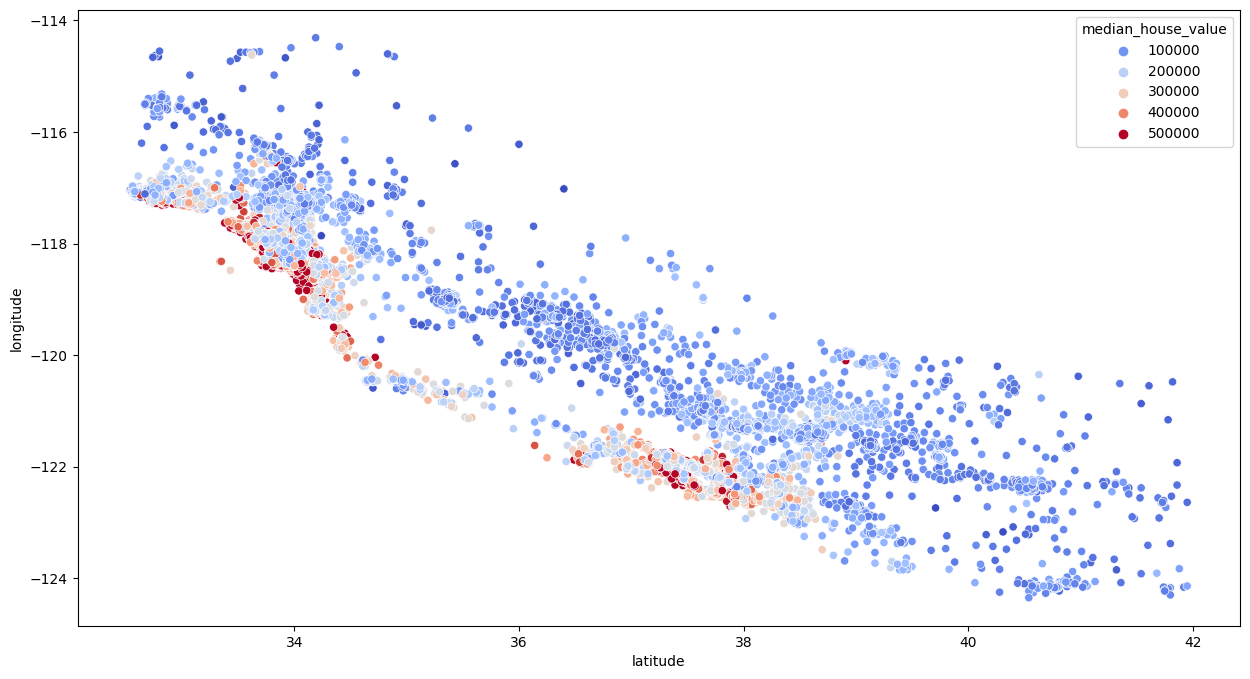

In [55]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=train_data['latitude'], y = train_data['longitude'], hue=train_data['median_house_value'], palette='coolwarm')

In [56]:
# Feature Engineering

train_data['rooms_per_household'] = train_data['total_rooms'] / train_data['households']
train_data['bedrooms_ratio'] = train_data['total_bedrooms']/ train_data['total_rooms']

<AxesSubplot: >

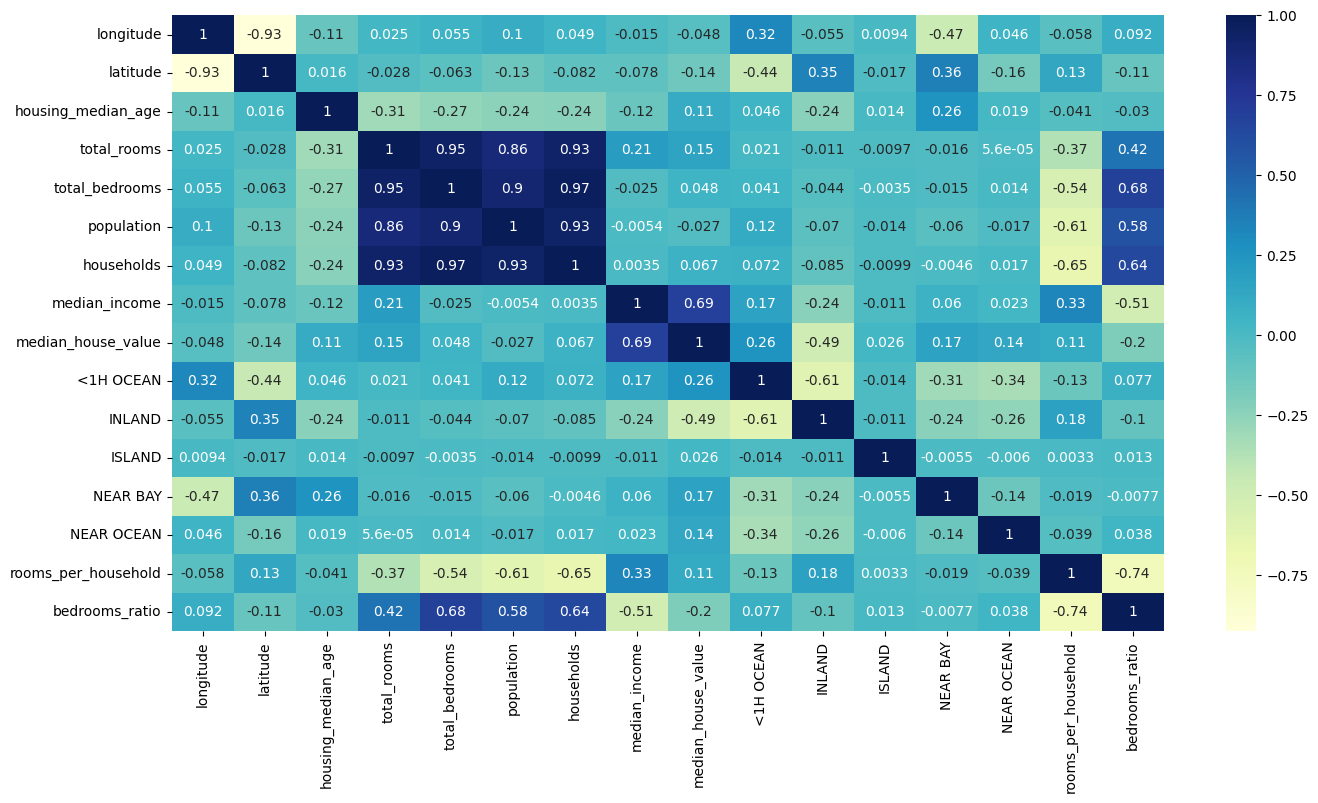

In [57]:
plt.figure(figsize=(16,8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

In [58]:
test_data = X_test.join(y_test)

test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['rooms_per_household'] = test_data['total_rooms'] / test_data['households']
test_data['bedrooms_ratio'] = test_data['total_bedrooms']/ test_data['total_rooms']

In [60]:
print(test_data.shape)
print(train_data.shape)

(4087, 16)
(16346, 16)


In [61]:
X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
model = RandomForestRegressor()

X_train_s = scaler.fit_transform(X_train)

model.fit(X_train_s, y_train)

RandomForestRegressor()

In [66]:
X_test_s = scaler.transform(X_test)

In [67]:
model.score(X_test_s, y_test)

0.8168110137218336

In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[400, 450],
    'max_features':[11]
}

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5,
                            scoring='neg_mean_squared_error',
                            return_train_score=True)

grid_search.fit(X_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [11], 'n_estimators': [400, 450]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [81]:
grid_search.best_estimator_

RandomForestRegressor(max_features=11, n_estimators=400)

In [82]:
best_model = grid_search.best_estimator_
best_model.score(X_test_s, y_test)

0.8208910073474488

In [83]:
from xgboost import XGBRegressor

xg_model = XGBRegressor()

In [85]:
xg_model.fit(X_train_s, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [86]:
xg_model.score(X_test_s, y_test)

0.8299698181821442

In [102]:
xg_params = {
    'n_estimators': [2650, 2700, 2750],
    'learning_rate': [0.05]
}

xg_search = GridSearchCV(xg_model, xg_params, cv = 5,
                        scoring='neg_mean_squared_error',
                        return_train_score=True)

xg_search.fit(X_train_s, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    callbacks=None, colsample_bylevel=1,
                                    colsample_bynode=1, colsample_bytree=1,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=0, gpu_id=-1,
                                    grow_policy='depthwise',
                                    importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.300000012,...6,
                                    max_cat_threshold=64, max_cat_to_onehot=4,
                                    max_delta_step=0, max_depth=6, max_leaves=0,
                                    min_child_weight=1, missing=nan,
                                    monotone_constraints='()', n_estimators=100,
                                    n_jobs=0, num_parallel_tree=1,
                                    predictor='auto', random_state=0, ...),
             param_grid={'learning_rate': [0.05],
                         'n_estimators': [2650, 2700, 2750]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [103]:
xg_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=2650, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [104]:
xg_best = xg_search.best_estimator_
xg_best.score(X_test_s, y_test)

0.8452212985823985